In [1]:
import detectron2

In [15]:
import torch
import os
from pathlib import Path
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [16]:
train_data= pd.read_json('data/train/Vindr_RibCXR_train_mask.json')

In [22]:
i=0
list_label= ['R1','R2','R3','R4','R5','R6','R7','R8','R9','R10',\
                         'L1','L2','L3','L4','L5','L6','L7','L8','L9','L10']

In [23]:
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

In [25]:
colors=[np.array([0.5, 0. , 0. ], dtype=np.float32),np. array([1. , 0.5, 0. ], dtype=np.float32),\
        np.array([1., 1., 0.], dtype=np.float32), np.array([0.667, 0.667, 0.   ], dtype=np.float32),\
        np.array([0.333, 0.333, 0.5  ], dtype=np.float32), np.array([0.   , 0.833, 0.   ], dtype=np.float32),\
        np.array([0.667, 0.667, 0.5  ], dtype=np.float32), np.array([0.333, 0.333, 0.   ], dtype=np.float32), \
        np.array([1.   , 0.333, 0.   ], dtype=np.float32), np.array([0.5, 0. , 0. ], dtype=np.float32),\
        np.array([0.333, 0.667, 0.   ], dtype=np.float32), np.array([0., 0., 0.], dtype=np.float32),\
        np.array([0.667, 0.667, 1.   ], dtype=np.float32), np.array([0. , 0. , 0.5], dtype=np.float32),\
        np.array([0.   , 0.447, 0.741], dtype=np.float32), np.array([0.301, 0.745, 0.933], dtype=np.float32),\
        np.array([0.667, 1.   , 1.   ], dtype=np.float32), np.array([1., 1., 0.], dtype=np.float32),\
        np.array([0.   , 0.333, 0.5  ], dtype=np.float32), np.array([0.667, 0.   , 0.5  ], dtype=np.float32)]

(2880, 2304, 3)
(20, 2880, 2304)


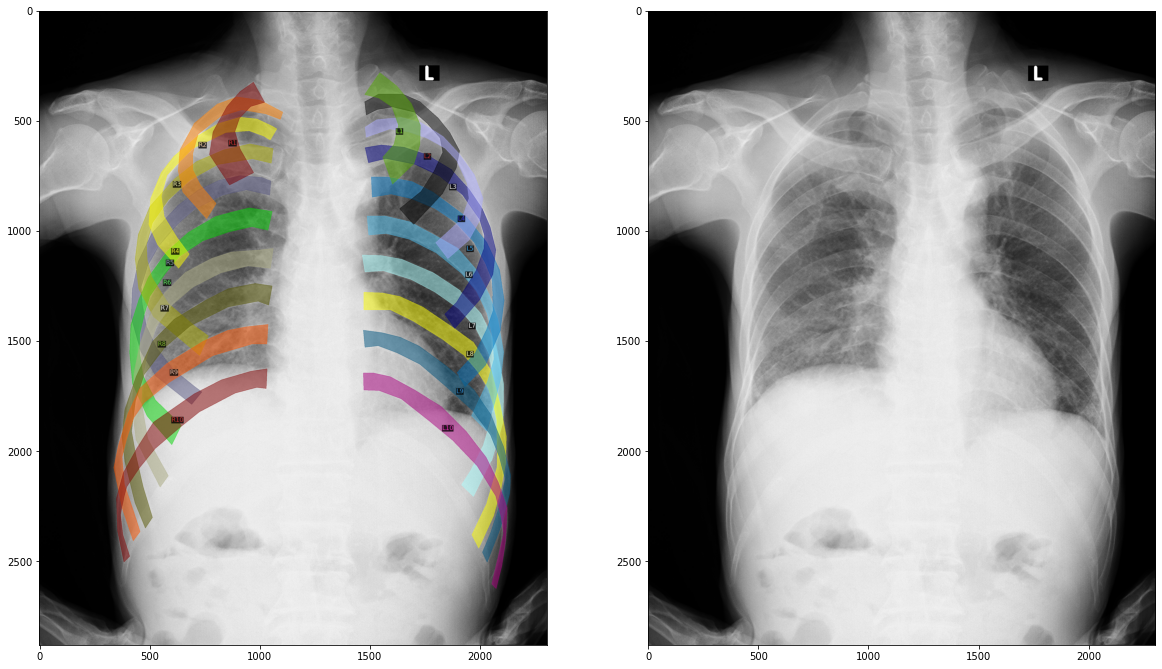

In [30]:

img_path=train_data['img'][i]
img=Image.open(img_path)
img=img.convert('RGB')
img=np.asarray(img,dtype=np.uint8)
label0=[]
for name in list_label:
    pts=train_data[name][i]
    label= np.zeros((img.shape[:2]),dtype=np.uint8)
    if pts!='None':
        pts= np.array([[[int(pt['x']),int(pt['y'])]] for pt in pts ])
        label=cv2.fillPoly(label,[pts],255)
    label0.append(label)
label0=np.stack(label0)
print(img.shape)
print(label0.shape)
vs=Visualizer(img_rgb=img,instance_mode=ColorMode.SEGMENTATION)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(vs.overlay_instances(masks=label0,labels=list_label, assigned_colors=colors).get_image())
plt.subplot(122)
plt.imshow(img)
plt.show()